# 1. 免学部分
* 虽然没有开始写材料，但是大家知道哪些是免学的内容，可以开始看书
* p175~p176
* p179~p181
* p188~p191 (从使用多级索引开始）

* 扣除免学部分只有11面



# 2. 前言

* 大家在做题目前一定要先把第10章的书读一下
* 写本作业，请使用 Anaconda 里的 Notebook
* 我做了一个[打包下载 Link](https://downgit.github.io/#/home?url=https://github.com/liuhui998/pe2/tree/master/10-groupby), 大家下载下来解压后，使用 Notebook 打开

# 3. 学习概要
* 我会在每道题有前标明对的书页码
* 如果超纲我会提前提示，并加上资料 Link
---
重点知识：
* df['col_name'].unique() 函数得到某一列不重复值

* 使用 Path("父目录/子目录").mkdir(parents=True, exist_ok=True)来创建目录

* df.query("age > 18") 函数 从 DataFrame 中查询数据, 比之前学的方法更简单

* df.sort_values 函数, 对 DataFrame 按某几列的值进行排序

* df.rank 函数，对分组的数据进行排名

* df.cumsum 函数，对分组的数据进行累加求和

* px.treemap 画出可折叠的树状图

---
知识点整理

* [Plotly 图表简介](https://plotly.com/python/)

* [Plotly和Pandas配合简介（英文）](https://plotly.com/python/pandas-backend/)

* [Plotly Express官方网站](https://plotly.com/python/plotly-express/)
* [pathlib 介绍](https://juejin.im/post/6844903721017540621)
* [pathlib 官方文档](https://docs.python.org/zh-cn/3/library/pathlib.html)
* [Pandas query 的用法](https://www.twblogs.net/a/5c9e02cdbd9eee7523886b5d) 
* [Pandas sort_values函数详解](https://zhuanlan.zhihu.com/p/35013079)
* [Pandas rank 函数详解](https://zhuanlan.zhihu.com/p/87593543) 作者讲的很认真，Peter推荐看一下
* [Pandas cumsum函数文档](https://www.cjavapy.com/article/376/)
* [px.treemap 官方文档](https://plotly.com/python/treemaps/)

---
学霸专用：

* [一场pandas与SQL的巅峰大战](https://zhuanlan.zhihu.com/p/104159257)

## 可视化说明

[Plotly 图表简介](https://plotly.com/python/)

[Plotly和Pandas配合简介（英文）](https://plotly.com/python/pandas-backend/)

[Plotly Express官方网站](https://plotly.com/python/plotly-express/)



* 我们在这里会教一下 plotly express 可视化，[Plotly Express官方网站](https://plotly.com/python/plotly-express/)

  这比之前在 Pandas 里用 df.plot() 来画图，它的可选项更多，画的图更高级大家可以玩一下。（备注 plotly express / df.plot 用的都同一套技术内核，就像小米华为目前用的都是Android操作系统，只是表皮不一样)
  
  这也是我特意超纲的部分，只每天超纲一点点，后面的学习才会越来越轻松！


* 首先我们安装 plotly  kaleido cufflinks 这三个包（只用安装一次就好）
* 你安装成功后就可以在 !pip 前加一个 #, 这样下次就不用重复安装

In [ ]:
!pip install -U plotly  kaleido cufflinks


In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"


# 切分各大洲的人口数据
---
备注: 这里综合了 p172 和之前数据过滤的内容

* 使用 unique() 函数得到某一列不重复值
* 使用了 plotly express 自带的人口数据集 
```
    px.data.gapminder()
```
---
背景：

* 你现在负责公司的产品战略规划
* 你带领团队分析各大洲的人口变化及分布等数据
* 要要将人口分布数据按大洲切分成若干个 Excel

---
解题步骤：

* 世界人口数据在 gap 中
* 取得所有不重复的大洲，放到 continents 中
* 循环遍历 continents，有一个变量存储每一次循环的 continent
      用 continent 从 gap 取这个大洲的数据，放到 df 
      用 continent 拼接出要保存的文件名 file_name
      把 df 里的数据保存到 file_name


In [3]:
# 非题目，取得世界人口相关数据
gap = px.data.gapminder()
gap

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [4]:
continents = gap['continent'].unique()
continents

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [5]:
for continent in continents:
    df = gap[gap.continent == continent]
    file_name = f"{continent}.xlsx"
    df.to_excel(file_name)

# 切分各大洲/国家的人口数据
---
备注: 这里综合了 p187 和之前数据过滤的内容

* 使用 unique() 函数得到某一列不重复值
* 这里又超纲学习了 pathlib 来创建目录
```
  Path("父目录/子目录").mkdir(parents=True, exist_ok=True)    
  Path("BG1/BU1").mkdir(parents=True, exist_ok=True)    
```  
  Path() 里的参数是目录路径，可以只有一层 "目录1", 
  
  也可以有N层: "BG1/BU1/SKU1", "爷爷目录/爸爸目录/儿子目录/孙子目录"
  
  parents=True  表示当 "爷爷目录/爸爸目录/儿子目录", 有任何一层目录不存时，它会自动帮你补创建好
  
  exist_ok=True 表示如果创建这个目录已存时，它会自动跳过，不报错
  

* [pathlib 介绍](https://juejin.im/post/6844903721017540621)
* [pathlib 官方文档](https://docs.python.org/zh-cn/3/library/pathlib.html)
---
背景：

* 接上一题
* 公司发现人口信息要深挖的信息太多了
* 要求你把为每个大洲建一个目录
* 然后每个国家一个 xlsx 文件，放到国家所在的大洲目录里

---
解题步骤：

* 对 gap 的 ['continent','country'] 进行 groupby + sum, 结果放到 stats

   sum/count 都可以，主要目的是为取出不重复的 ['continent','country'] 组合出来
   
* 取出 stats 的索引，放到 continent_countries

* 循环遍历 continent_countries，有一个变量存储每一次循环的 continent_country
      从 continent_country 中取得大洲名 continent
      从 continent_country 中取得国家名 country
      用大洲名(continent) 创建一个目录（如果存在也不报错exist_ok=True）
         Path(continent).mkdir(parents=True, exist_ok=True)    
      用 continent,country 拼接出要保存的文件名 file_name
         因为是要保存在 continent 目录下，所以在continent,country之间要有"/"
      用 continent,country 从 gap 取这个大洲/国家的数据，放到 df 
      把 df 里的数据保存到 file_name


---


In [6]:
# 对 gap 的 ['continent','country'] 进行 groupby + sum, 结果放到 stats
#  sum/count 都可以，主要目的是为取出不重复的 ['continent','country'] 组合出来
stats = gap.groupby(['continent','country']).sum()
stats

year  lifeExp        pop      gdpPercap  iso_num
continent country                                                          
Africa    Algeria         23754  708.362  238504874   53112.311678      144
          Angola          23754  454.602   87712681   43285.206346      288
          Benin           23754  585.359   48209960   13864.741289     2448
          Botswana        23754  655.170   11654234   60378.042686      864
          Burkina Faso    23754  536.328   90584127   10127.887977    10248
...                         ...      ...        ...            ...      ...
Europe    Switzerland     23754  906.781   76611518  324892.012860     9072
          Turkey          23754  716.357  550908099   53633.440556     9504
          United Kingdom  23754  887.071  673053608  232565.675827     9912
Oceania   Australia       23754  895.955  175791750  239767.147610      432
          New Zealand     23754  887.874   37200386  207151.473750     6648

[142 rows x 5 columns]

In [7]:
# 取出 stats 的索引，放到 continent_countries
continent_countries = stats.index
continent_countries

MultiIndex([( 'Africa',                  'Algeria'),
            ( 'Africa',                   'Angola'),
            ( 'Africa',                    'Benin'),
            ( 'Africa',                 'Botswana'),
            ( 'Africa',             'Burkina Faso'),
            ( 'Africa',                  'Burundi'),
            ( 'Africa',                 'Cameroon'),
            ( 'Africa', 'Central African Republic'),
            ( 'Africa',                     'Chad'),
            ( 'Africa',                  'Comoros'),
            ...
            ( 'Europe',                   'Serbia'),
            ( 'Europe',          'Slovak Republic'),
            ( 'Europe',                 'Slovenia'),
            ( 'Europe',                    'Spain'),
            ( 'Europe',                   'Sweden'),
            ( 'Europe',              'Switzerland'),
            ( 'Europe',                   'Turkey'),
            ( 'Europe',           'United Kingdom'),
            ('Oceania',       

In [8]:
# 导入 pathlib 里相关的包，(非题目)
from pathlib import Path

In [9]:
"""
* 循环遍历 continent_countries，有一个变量存储每一次循环的 continent_country
      从 continent_country 中取得大洲名 continent
      从 continent_country 中取得国家名 country
      用大洲名(continent) 创建一个目录（如果存在也不报错exist_ok=True）
         Path(continent).mkdir(parents=True, exist_ok=True)    
      用 continent,country 拼接出要保存的文件名 file_name
         因为是要保存在 continent 目录下，所以在continent,country之间要有"/"
      用 continent,country 从 gap 取这个大洲/国家的数据，放到 df 
      把 df 里的数据保存到 file_name
"""
for continent_country in continent_countries:
    continent = continent_country[0]
    country = continent_country[1]
    Path(continent).mkdir(parents=True, exist_ok=True)    
    file_name = f"{continent}/{country}.xlsx"
    print(file_name)
    df = gap[(gap.continent == continent) &
             (gap.country == country)]
    df.to_excel(file_name)

Africa/Algeria.xlsx
Africa/Angola.xlsx
Africa/Benin.xlsx
Africa/Botswana.xlsx
Africa/Burkina Faso.xlsx
Africa/Burundi.xlsx
Africa/Cameroon.xlsx
Africa/Central African Republic.xlsx
Africa/Chad.xlsx
Africa/Comoros.xlsx
Africa/Congo, Dem. Rep..xlsx
Africa/Congo, Rep..xlsx
Africa/Cote d'Ivoire.xlsx
Africa/Djibouti.xlsx
Africa/Egypt.xlsx
Africa/Equatorial Guinea.xlsx
Africa/Eritrea.xlsx
Africa/Ethiopia.xlsx
Africa/Gabon.xlsx
Africa/Gambia.xlsx
Africa/Ghana.xlsx
Africa/Guinea.xlsx
Africa/Guinea-Bissau.xlsx
Africa/Kenya.xlsx
Africa/Lesotho.xlsx
Africa/Liberia.xlsx
Africa/Libya.xlsx
Africa/Madagascar.xlsx
Africa/Malawi.xlsx
Africa/Mali.xlsx
Africa/Mauritania.xlsx
Africa/Mauritius.xlsx
Africa/Morocco.xlsx
Africa/Mozambique.xlsx
Africa/Namibia.xlsx
Africa/Niger.xlsx
Africa/Nigeria.xlsx
Africa/Reunion.xlsx
Africa/Rwanda.xlsx
Africa/Sao Tome and Principe.xlsx
Africa/Senegal.xlsx
Africa/Sierra Leone.xlsx
Africa/Somalia.xlsx
Africa/South Africa.xlsx
Africa/Sudan.xlsx
Africa/Swaziland.xlsx
Africa/Ta

# 分析 2007 年的人口数据
---
备注: 这一题又是超纲题

不过这些内容在我们之前发的那张: [Pandas小抄纸](https://geektutu.com/post/pandas-cheat-sheet-zh-cn/Pandas_Cheat_Sheet_zh_CN.pdf)上都有, (如果没有的同学快点下载下来打印）

大家请拿出笔来，看看这两张纸上有多少函数大家掌握了，我们说好要学懂80%的哈！

* df.query 函数 从 DataFrame 中查询数据, 比之前学的方法更简单

* df.sort_values 函数, 对 DataFrame 按某几列的值进行排序

* df.rank 函数，对分组的数据进行排名

* df.cumsum 函数，对分组的数据进行累加求和

* px.treemap 画出可折叠的树状图


---
背景：

* 我们想对 2007 年的人口数据进行深度分析
* 想对每个大洲国家人口数进行分组排名，得到它在本大洲内的排名
* 得到每个大洲国家人员分组进行累加求和，了解分布曲线
* 到到每个大洲人口数进三的国家信息
* 想用可视化的方法，分析世界人口分布

* 这里的方法是用来分析人口数据，大家也可以同样用来分析产品数据

---
解题步骤：

* 
---

* [Pandas query 的用法](https://www.twblogs.net/a/5c9e02cdbd9eee7523886b5d) 
* [Pandas sort_values函数详解](https://zhuanlan.zhihu.com/p/35013079)
* [Pandas rank 函数详解](https://zhuanlan.zhihu.com/p/87593543) 作者讲的很认真，Peter推荐看一下
* [Pandas cumsum函数文档](https://www.cjavapy.com/article/376/)
* [px.treemap 官方文档](https://plotly.com/python/treemaps/)

---
学霸专用：

* [一场pandas与SQL的巅峰大战](https://zhuanlan.zhihu.com/p/104159257)

In [25]:
# 过滤 gap 中 year == 2007 的数据
# 对大洲(continent)升序，人口(pop)降序进行排序
# 将数据放到 df_2007 中

df_2007 = gap.query("year == 2007").sort_values(by=['continent','pop'],ascending=[True,False])
df_2007 = df_2007[['continent','country','pop','lifeExp']]
df_2007.head()

,continent,country,pop,lifeExp
1139,Africa,Nigeria,135031164,46.859
467,Africa,Egypt,80264543,71.338
515,Africa,Ethiopia,76511887,52.947
335,Africa,"Congo, Dem. Rep.",64606759,46.462
1415,Africa,South Africa,43997828,49.339


In [26]:
# 对 df_2007 中有数据按大洲(continent)进行分组(groupby)
# 并按人员数量的降序(ascending = False)，对国家进行排名
# 将排名信息放到 df_2007 的 rank 列中
df_2007['rank'] = df_2007.groupby(["continent"])['pop'].rank(ascending = False)
df_2007

,continent,country,pop,lifeExp,rank
1139,Africa,Nigeria,135031164,46.859,1.0
467,Africa,Egypt,80264543,71.338,2.0
515,Africa,Ethiopia,76511887,52.947,3.0
335,Africa,"Congo, Dem. Rep.",64606759,46.462,4.0
1415,Africa,South Africa,43997828,49.339,5.0
...,...,...,...,...,...
1391,Europe,Slovenia,2009245,77.926,28.0
1019,Europe,Montenegro,684736,74.543,29.0
695,Europe,Iceland,301931,81.757,30.0
71,Oceania,Australia,20434176,81.235,1.0


In [27]:
df_2007.query("continent == 'Asia'")

,continent,country,pop,lifeExp,rank
299,Asia,China,1318683096,72.961,1.0
707,Asia,India,1110396331,64.698,2.0
719,Asia,Indonesia,223547000,70.650,3.0
1175,Asia,Pakistan,169270617,65.483,4.0
107,Asia,Bangladesh,150448339,64.062,5.0
803,Asia,Japan,127467972,82.603,6.0
1223,Asia,Philippines,91077287,71.688,7.0
1655,Asia,Vietnam,85262356,74.249,8.0
731,Asia,Iran,69453570,70.964,9.0
1535,Asia,Thailand,65068149,70.616,10.0


In [28]:
# 从 df_2007 里查询所有 rank 小于4 的数据，放到every_continet_top3
# 如果大家不习惯 query, 还是可以用之前的 [] 来查询数据
every_continet_top3 = df_2007.query("rank < 4")
every_continet_top3

,continent,country,pop,lifeExp,rank
1139,Africa,Nigeria,135031164,46.859,1.0
467,Africa,Egypt,80264543,71.338,2.0
515,Africa,Ethiopia,76511887,52.947,3.0
1619,Americas,United States,301139947,78.242,1.0
179,Americas,Brazil,190010647,72.390,2.0
995,Americas,Mexico,108700891,76.195,3.0
299,Asia,China,1318683096,72.961,1.0
707,Asia,India,1110396331,64.698,2.0
719,Asia,Indonesia,223547000,70.650,3.0
575,Europe,Germany,82400996,79.406,1.0


In [29]:
# 对df_2007 的数据按 continent 的分组(groupby)
# 再对人口(pop)字段进行累计求和(累加)
# 把累加结果放到 df_2007 里的 cumsum 列
df_2007['cumsum'] = df_2007.groupby(["continent"])['pop'].cumsum()

In [30]:
#查看一下亚洲的数据（非题目）
df_2007.sort_values(by=["continent","rank"]).query("continent == 'Asia'").head(10)

,continent,country,pop,lifeExp,rank,cumsum
299,Asia,China,1318683096,72.961,1.0,1318683096
707,Asia,India,1110396331,64.698,2.0,2429079427
719,Asia,Indonesia,223547000,70.650,3.0,2652626427
1175,Asia,Pakistan,169270617,65.483,4.0,2821897044
107,Asia,Bangladesh,150448339,64.062,5.0,2972345383
803,Asia,Japan,127467972,82.603,6.0,3099813355
1223,Asia,Philippines,91077287,71.688,7.0,3190890642
1655,Asia,Vietnam,85262356,74.249,8.0,3276152998
731,Asia,Iran,69453570,70.964,9.0,3345606568
1535,Asia,Thailand,65068149,70.616,10.0,3410674717


In [35]:
# 画一下亚洲人口的累计分布曲线，从图可以看出
# 中国和印度的人口占了超过亚洲一半 （非题目)
asia = df_2007[df_2007.continent == 'Asia'][['country','cumsum']]
asia = asia.set_index('country')
asia_fig = asia.plot()
asia_fig.show()


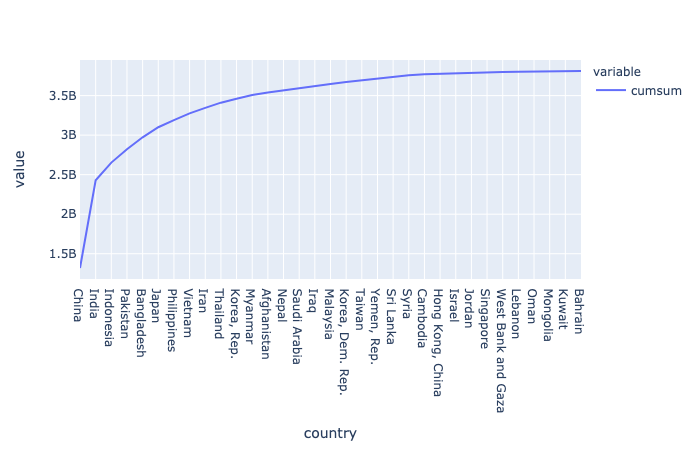

In [37]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
asia_fig.show('png')

In [33]:
# 使用 px.treemap 画出 2007年世界人口各国人口占比图
# px.treemap 函数各个参数的介绍
#   df_2007 是它的数据参数
#   path=['continent', 'country'], 表名图表的显示顺序
#        先显示大洲(continent), 国家/地区(country)
#   values = 'pop' 表示树型图以人口(pop)为数值（方块大小）
#   color = 'lifeExp' 表示树型图以人口预计寿命(lifeExp)为方块颜色
fig = px.treemap(
    df_2007, 
    path=['continent', 'country'], 
    values='pop',
    color='lifeExp'
)

fig.show()

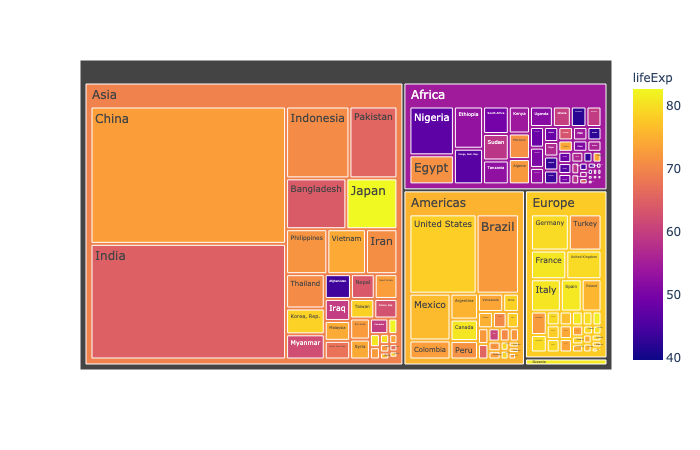

In [38]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
fig.show('png')

#  最后的分析

---
备注: 这里综合了 p176 的内容

因为前面的题目都比较难，这一题的内容较为简单，让大家快乐的结束这一章

---
背景：

* 公司想看每个大洲的各个国家人口，最多是多少人，最少是多少人，总和是多少

---
解题步骤：

* 对gap 的大洲(continent) 进行分组 groupby
  然后调用聚和(agg)函数，传入参数: ["max","min","sum"]
  将值赋给 continent_stat

* 使用 reset_index 函数，将continent_stat里的索引变成列；
  通过重置索引，将分层的结果平铺展示



In [49]:
"""
对gap 的大洲(continent) 进行分组 groupby
  然后调用聚和(agg)函数，传入参数: ["max","min","sum"]
  将值赋给 continent_stat
"""
continent_stat = gap.groupby(['continent'])['pop'].agg(
    ['max','min','sum']
)
continent_stat

,max,min,sum
continent,,,
Africa,135031164,60011,6187585961
Americas,301139947,662850,7351438499
Asia,1318683096,120447,30507333901
Europe,82400996,147962,6181115304
Oceania,20434176,1994794,212992136


In [44]:
# 解法2
#continent_stat = gap.groupby(['continent'])['pop'].agg(
#    [np.max,np.min,np.sum]
#)
#continent_stat

In [51]:
# 查看索引，（非题目）
continent_stat.index

Index(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype='object', name='continent')

In [46]:
# 查看列信息，（非题目）
continent_stat.columns

Index(['max', 'min', 'sum'], dtype='object')

In [52]:
"""
* 使用 reset_index 函数，将continent_stat里的索引变成列；
  通过重置索引，将分层的结果平铺展示
"""
continent_stat = continent_stat.reset_index()
continent_stat

,continent,max,min,sum
0,Africa,135031164,60011,6187585961
1,Americas,301139947,662850,7351438499
2,Asia,1318683096,120447,30507333901
3,Europe,82400996,147962,6181115304
4,Oceania,20434176,1994794,212992136


In [54]:
# 再一次查看列名（非题目)
continent_stat.columns

Index(['continent', 'max', 'min', 'sum'], dtype='object')

# 8. 参考资料
* [Plotly 图表简介](https://plotly.com/python/)

* [Plotly和Pandas配合简介（英文）](https://plotly.com/python/pandas-backend/)

* [Plotly Express官方网站](https://plotly.com/python/plotly-express/)
* [pathlib 介绍](https://juejin.im/post/6844903721017540621)
* [pathlib 官方文档](https://docs.python.org/zh-cn/3/library/pathlib.html)
* [Pandas query 的用法](https://www.twblogs.net/a/5c9e02cdbd9eee7523886b5d) 
* [Pandas sort_values函数详解](https://zhuanlan.zhihu.com/p/35013079)
* [Pandas rank 函数详解](https://zhuanlan.zhihu.com/p/87593543) 作者讲的很认真，Peter推荐看一下
* [Pandas cumsum函数文档](https://www.cjavapy.com/article/376/)
* [px.treemap 官方文档](https://plotly.com/python/treemaps/)

---
学霸专用：

* [一场pandas与SQL的巅峰大战](https://zhuanlan.zhihu.com/p/104159257)